We will analyze the following areas:
1. Table that contains the statistics of crawled corpus
    1. Number of posts
    2. Number of comments
    3. Total number of words
    4. Total number of unique words
    5. Number of subreddits crawled
    6. Number of sentiment labels
2. Distribution of subreddit data count
3. Word cloud for the cleaned and raw text


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud


file_path = 'data/processed_streaming_opinions.csv'

Here we will obtain the number of posts, comments, total number of words and number of unique words.

In [ ]:
# Load in the processed streaming opinions dataset
df = pd.read_csv(file_path)
num_of_records = len(df)
print(f'Number of records: {num_of_records}')

type_counts = df['type'].value_counts()
print("Total posts:", type_counts.get('submission',0))
print("Total comments:", type_counts.get('comment',0))

# Count total number of words
df['word_count'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))
total_words = df['word_count'].sum()
print(f'Total number of words: {total_words}')

# Count unique words (types)
all_words = ' '.join(df['cleaned_text'].fillna('').astype(str)).split()
unique_words = set(all_words)
num_types = len(unique_words)
print(f'Number of unique words: {num_types}')

Number of records: 60028
Total posts: 285
Total comments: 59743


1. We first analyze the distribution of subreddit data count

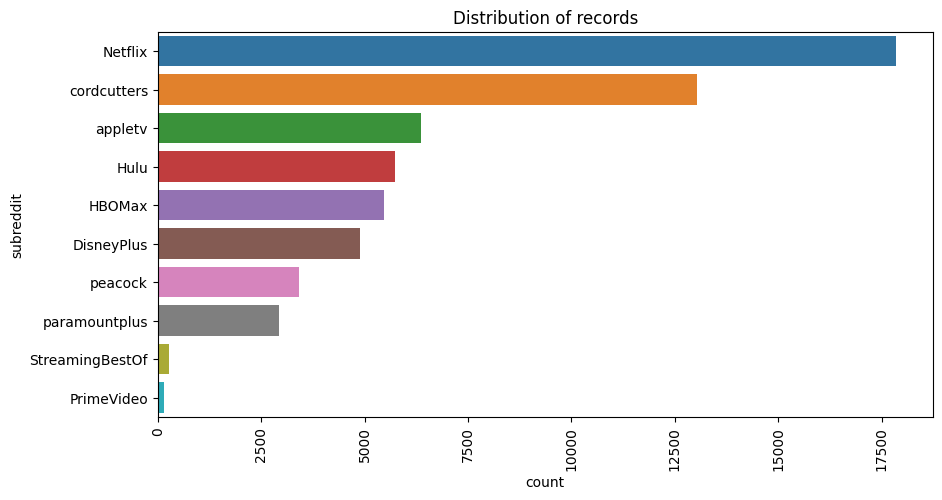

In [ ]:
# Plot chart for distribution of subreddit data count
plt.figure(figsize=(10, 5))
# Plot horizontal bar chart
sns.countplot(y='subreddit', data=df, order=df['subreddit'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of records')
plt.show()

2. Next we generate the word cloud for the cleaned text

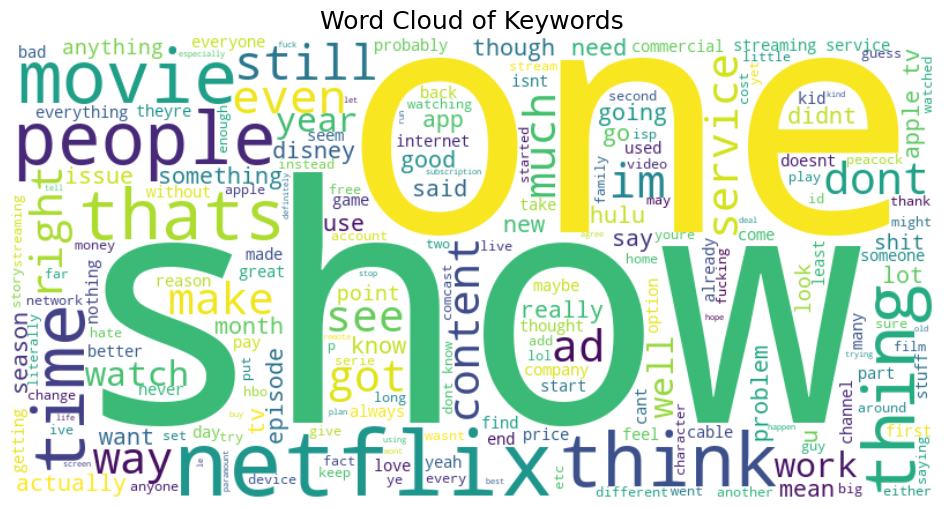

In [13]:
from nltk.corpus import stopwords

# Generate word cloud
# all_keywords = [word for keywords in df['keywords'] for word in keywords]
text = ' '.join(word for word in df['cleaned_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 4. Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Keywords", fontsize=18)
plt.show()